In [3]:
import pandas as pd

In [4]:
# Load the dataset
dataset_path = "/content/IMDB Dataset.csv"
df = pd.read_csv(dataset_path, quotechar='"', on_bad_lines='skip')



In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
df.isnull().sum()

,0
review,0
sentiment,0


In [9]:
# Data cleaning and EDA

In [10]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [11]:
 df.drop_duplicates(subset=['review', 'sentiment'])

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
#Text cleanup

In [13]:
import re
from bs4 import BeautifulSoup

In [14]:
#Lowercasing the text
df['review'] = df['review'].apply(lambda x: x.lower())


In [15]:
#Removing HTML tags
df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


<ipython-input-15-d275fcb34cfe>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['review'] = df['review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


In [16]:
#Removing punctuation
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [17]:
#Removing special characters
df['review'] = df['review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


In [18]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [19]:
#Exploratory Data Analysis (EDA)

In [20]:
import matplotlib.pyplot as plt

In [21]:
sentiment_counts = df['sentiment'].value_counts()

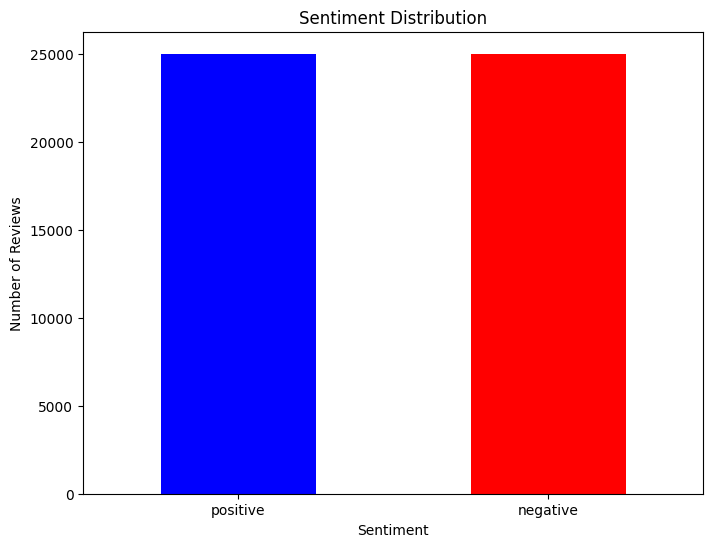

In [22]:
# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [23]:
#Review length

df['review_length'] = df['review'].apply(lambda x: len(x.split()))
avg_length = df.groupby('sentiment')['review_length'].mean()

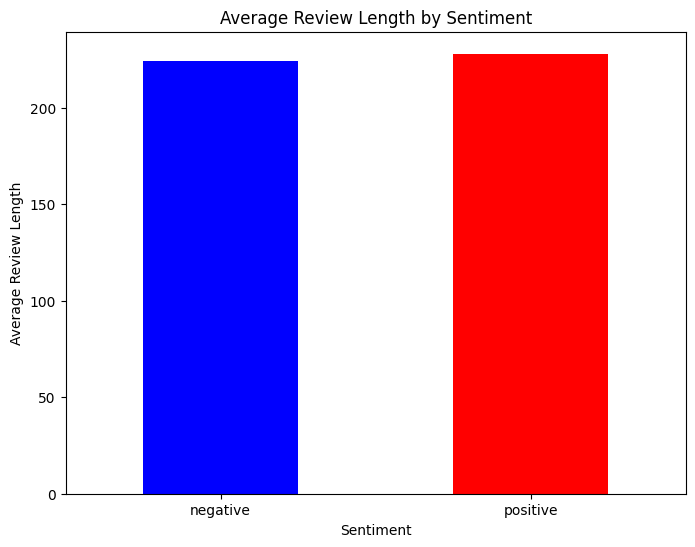

In [24]:
# Plotting the review length
plt.figure(figsize=(8, 6))
avg_length.plot(kind='bar', color=['blue', 'red'])
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Review Length')
plt.xticks(rotation=0)
plt.show()

In [25]:
#Most Frequent Words

from wordcloud import WordCloud

In [26]:
all_reviews = ' '.join(df['review'].tolist())

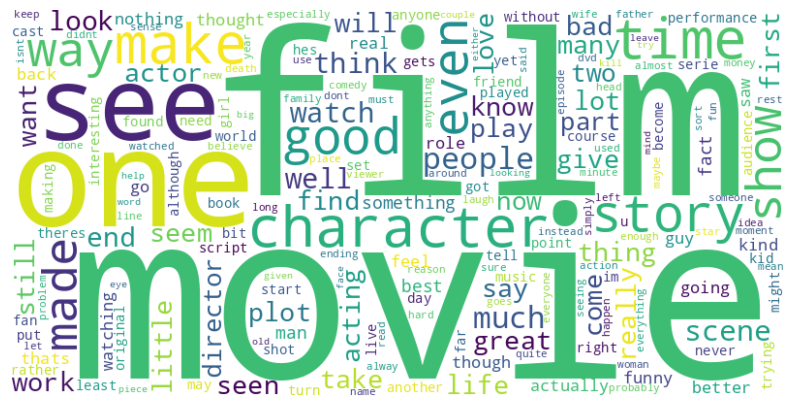

In [27]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
#generate eda report

!pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 91.4 MB/s eta 0:00:00


In [29]:
import sweetviz as sv

df = pd.read_csv(dataset_path)

report = sv.analyze(df)

report.show_html('IMDB_EDA_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report IMDB_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
from google.colab import files

# Download the report file
files.download('IMDB_EDA_Report.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
#prepare the data
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)


In [33]:
# Vectorize Text Data with TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

In [35]:
# Fit and transform the training data, transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [36]:
#Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [37]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [38]:
# Train the model on the training data
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [40]:
#Evaluate the Model on Test Data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [41]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_tfidf)


In [42]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [43]:
accuracy

0.8968

In [44]:
precision

0.8894778170396545

In [45]:
recall

0.9062

In [46]:
f1

0.8977610461660392

In [47]:
classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

'              precision    recall  f1-score   support\n\n    Negative       0.90      0.89      0.90      5000\n    Positive       0.89      0.91      0.90      5000\n\n    accuracy                           0.90     10000\n   macro avg       0.90      0.90      0.90     10000\nweighted avg       0.90      0.90      0.90     10000\n'

In [48]:
#Save the Model and TF-IDF Vectorizer

import joblib

In [49]:
# Save the model
joblib.dump(logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [50]:
files.download('logistic_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [52]:
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
#check the model for future use

logreg = joblib.load('logistic_regression_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

In [54]:
# Transform new text and predict sentiment
new_reviews = ["The movie was fantastic!", "I didn't like the film."]
new_reviews_tfidf = tfidf.transform(new_reviews)
predictions = logreg.predict(new_reviews_tfidf)

In [55]:
print(predictions)

[1 0]
